# XGBoost

In [10]:
import xgboost

In [ ]:
#!pip install xgboost

In [1]:
# 관련 파일 임포트

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 위스콘신 유방암 데이터셋

In [3]:
#데이터 준비
b_cancer = load_breast_cancer()

In [5]:
#b_cancer를 데이터프레임으로 만드시오(cancer_df)
# 마지막열을 "target"으로 명명하고 결과값을 할당한다.

cancer_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
cancer_df["target"] = b_cancer.target

X = b_cancer.data
y = b_cancer.target


# 데이터 분할
# test_size=0.2, random_state=156
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156)

In [7]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [8]:
def get_eval_score(y_test, y_pred, y_pred_proba):
    confusion = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred) # 정확도
    prec = precision_score(y_test, y_pred) # 정밀도
    recall = recall_score(y_test, y_pred) # 재현율
    f1 = f1_score(y_test, y_pred) # f1점수
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print("-"* 100)
    print("오차행렬:")
    print(confusion)
    print("정확도: {:.4f} 정밀도: {:.4f} 재현율: {:.4f} F1:{:.4f} AUC: {:.4f}".\
          format(acc, prec,recall, f1, roc_auc ))
    return

In [14]:
### 1. 조기종료 옵션을 사용하지 않는 경우
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3, random_state=156) # 학습율, 학습기 수?, 
xgb.fit(X_train, y_train, eval_metric='error') # early_stopping_Rounds, verbose-자세한정보로출력, callbacks

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
y_pred_train = xgb.predict(X_train)
y_pred_train_proba = xgb.predict_proba(X_train)
get_eval_score(y_train, y_pred_train, y_pred_train_proba[:,1]) 
get_eval_score(y_test, xgb.predict(X_test), xgb.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[175   0]
 [  0 280]]
정확도: 1.0000 정밀도: 1.0000 재현율: 1.0000 F1:1.0000 AUC: 1.0000
----------------------------------------------------------------------------------------------------
오차행렬:
[[35  2]
 [ 1 76]]
정확도: 0.9737 정밀도: 0.9744 재현율: 0.9870 F1:0.9806 AUC: 0.9951


In [ ]:
### 2. 조기 종료 옵션을 사용한 경우
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

In [26]:
xgb2 = XGBClassifier(n_estimators=400, max_depth=3, learning_rage=0.1)
xgb2.fit(X_train, y_train,early_stopping_rounds=100, eval_metric = 'logloss', eval_set= [(X_test,y_test)], verbose=True)

[10:26:13] WARNING: D:\Build\xgboost\xgboost-1.6.1.git\src\learner.cc:627: 
Parameters: { "learning_rage" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.47984
[1]	validation_0-logloss:0.36218
[2]	validation_0-logloss:0.29004
[3]	validation_0-logloss:0.23382
[4]	validation_0-logloss:0.19901
[5]	validation_0-logloss:0.17469
[6]	validation_0-logloss:0.15549
[7]	validation_0-logloss:0.13367
[8]	validation_0-logloss:0.12411
[9]	validation_0-logloss:0.11611
[10]	validation_0-logloss:0.10768
[11]	validation_0-logloss:0.10018
[12]	validation_0-logloss:0.09754
[13]	validation_0-logloss:0.08920
[14]	validation_0-logloss:0.09259
[15]	validation_0-logloss:0.09144
[16]	validation_0-logloss:0.09066
[17]	validation_0-logloss:0.09058
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rage=0.1, learning_rate=0.300000012, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [ ]:
* 하이퍼파라미터 튜닝( 조기종료 옵션 사용)

In [28]:
# 조기종료 모델에 대한 평가(early_stopping_rounds:100)
get_eval_score(y_train, xgb2.predict(X_train), xgb2.predict_proba(X_train)[:,1])
get_eval_score(y_test, xgb2.predict(X_test), xgb2.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[175   0]
 [  0 280]]
정확도: 1.0000 정밀도: 1.0000 재현율: 1.0000 F1:1.0000 AUC: 1.0000
----------------------------------------------------------------------------------------------------
오차행렬:
[[35  2]
 [ 3 74]]
정확도: 0.9561 정밀도: 0.9737 재현율: 0.9610 F1:0.9673 AUC: 0.9961


In [29]:
# 조기종료 모델 구축 및 평가(early_stopping_rounds=10)
xgb3 = XGBClassifier(n_estimators=400, max_depth=3, learning_rage=0.1)
xgb3.fit(X_train, y_train,early_stopping_rounds=10, eval_metric = 'logloss', eval_set= [(X_test,y_test)], verbose=True)

[10:33:29] WARNING: D:\Build\xgboost\xgboost-1.6.1.git\src\learner.cc:627: 
Parameters: { "learning_rage" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.47984
[1]	validation_0-logloss:0.36218
[2]	validation_0-logloss:0.29004
[3]	validation_0-logloss:0.23382
[4]	validation_0-logloss:0.19901
[5]	validation_0-logloss:0.17469
[6]	validation_0-logloss:0.15549
[7]	validation_0-logloss:0.13367
[8]	validation_0-logloss:0.12411
[9]	validation_0-logloss:0.11611
[10]	validation_0-logloss:0.10768
[11]	validation_0-logloss:0.10018
[12]	validation_0-logloss:0.09754
[13]	validation_0-logloss:0.08920
[14]	validation_0-logloss:0.09259
[15]	validation_0-logloss:0.09144
[16]	validation_0-logloss:0.09066
[17]	validation_0-logloss:0.09058
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rage=0.1, learning_rate=0.300000012, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [30]:
get_eval_score(y_train, xgb3.predict(X_train), xgb3.predict_proba(X_train)[:,1])
get_eval_score(y_test, xgb3.predict(X_test), xgb3.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[175   0]
 [  0 280]]
정확도: 1.0000 정밀도: 1.0000 재현율: 1.0000 F1:1.0000 AUC: 1.0000
----------------------------------------------------------------------------------------------------
오차행렬:
[[35  2]
 [ 3 74]]
정확도: 0.9561 정밀도: 0.9737 재현율: 0.9610 F1:0.9673 AUC: 0.9961


* 시각화

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

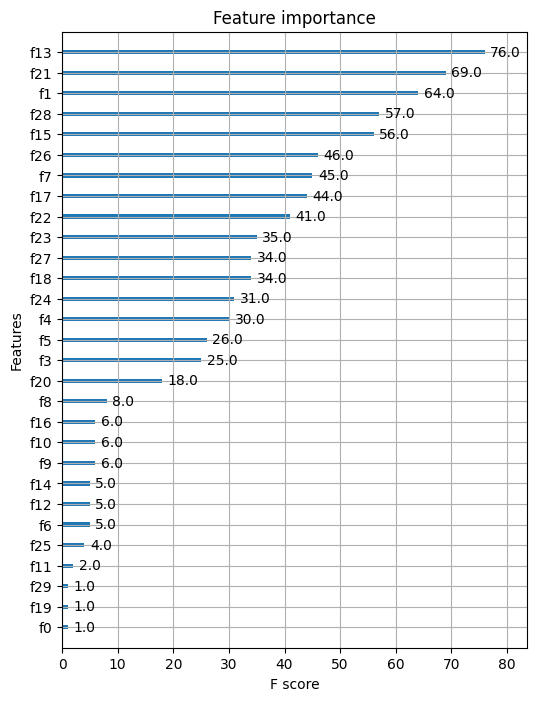

In [41]:
# 1)  xgboost가 제공하는 Plot_importance
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(6,8))
plot_importance(xgb, ax=ax)

<AxesSubplot: >

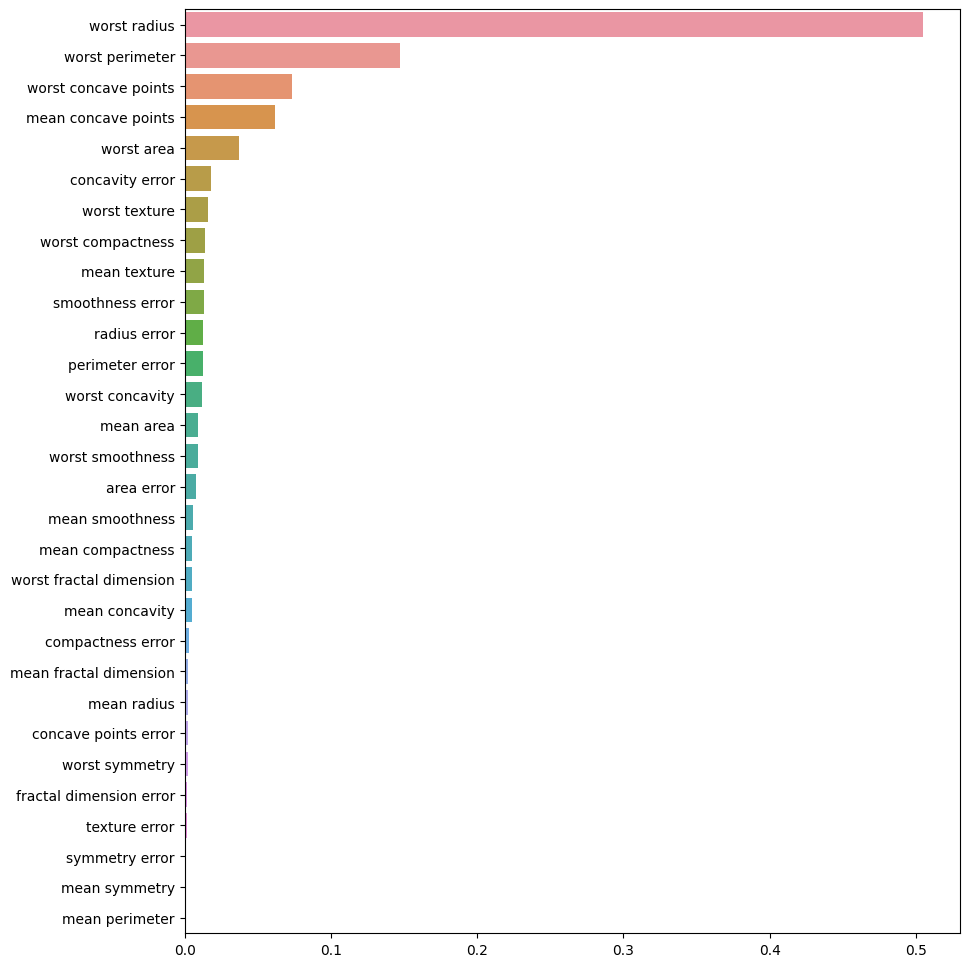

In [42]:
# 2) Series를 활용하는 경우 
imp_ft = pd.Series(xgb.feature_importances_, index=b_cancer.feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,12))
sns.barplot(x=imp_ft.values, y=imp_ft.index)

In [46]:
xgb.feature_importances_?

Type:        property
String form: <property object at 0x000001562EC944F0>
Docstring:  
Feature importances property, return depends on `importance_type` parameter.

Returns
-------
feature_importances_ : array of shape ``[n_features]`` except for multi-class
linear model, which returns an array with shape `(n_features, n_classes)`

# LightGBM(LGBM)

In [49]:
import lightgbm

In [51]:
lightgbm.__version__

'3.3.5'

## 위스콘신 유방암 데이터셋

In [52]:
# 조기 중단 옵션을 사용하지 않은 경우
from lightgbm import LGBMClassifier
Lg = LGBMClassifier(n_estimators=400, max_depth=3, learning_rate=0.1, device='gpu')
Lg.fit(X_train,y_train)

LGBMClassifier(device='gpu', max_depth=3, n_estimators=400)

In [54]:
# 조기중단 옵션을 사용한 경우
Lg2 = LGBMClassifier(n_estimators=400, random_state=156)
Lg2.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=[(X_test,y_test)], verbose=True)

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

LGBMClassifier(n_estimators=400, random_state=156)

In [55]:
get_eval_score(y_train, Lg2.predict(X_train),Lg2.predict_proba(X_train)[:,1])
get_eval_score(y_test, Lg2.predict(X_test),Lg2.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[175   0]
 [  0 280]]
정확도: 1.0000 정밀도: 1.0000 재현율: 1.0000 F1:1.0000 AUC: 1.0000
----------------------------------------------------------------------------------------------------
오차행렬:
[[33  4]
 [ 1 76]]
정확도: 0.9561 정밀도: 0.9500 재현율: 0.9870 F1:0.9682 AUC: 0.9905


In [56]:
get_eval_score(y_train, Lg.predict(X_train),Lg.predict_proba(X_train)[:,1])
get_eval_score(y_test, Lg.predict(X_test),Lg.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[175   0]
 [  0 280]]
정확도: 1.0000 정밀도: 1.0000 재현율: 1.0000 F1:1.0000 AUC: 1.0000
----------------------------------------------------------------------------------------------------
오차행렬:
[[33  4]
 [ 1 76]]
정확도: 0.9561 정밀도: 0.9500 재현율: 0.9870 F1:0.9682 AUC: 0.9944


In [61]:
lgbm_fmp = pd.Series(Lg2.feature_importances_, index=b_cancer.feature_names).sort_values(ascending=False)

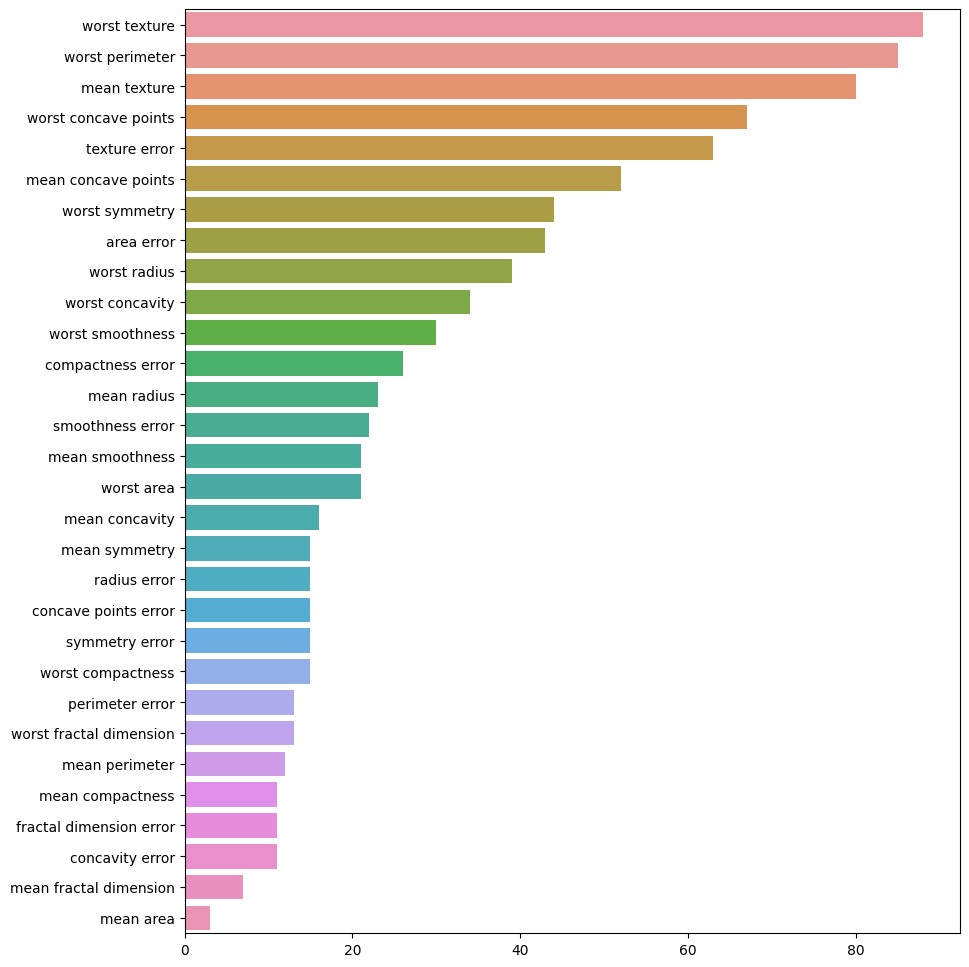

In [62]:
# 시각화
plt.figure(figsize=(10,12))
sns.barplot(x=lgbm_fmp, y=lgbm_fmp.index)
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

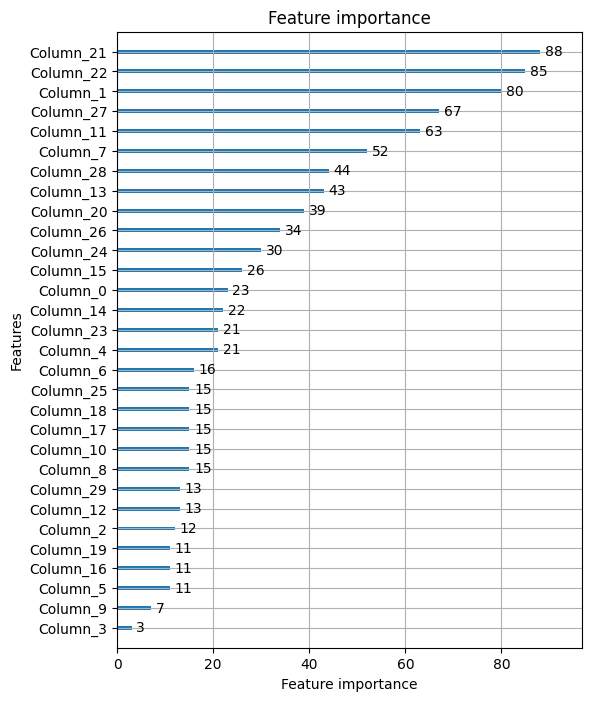

In [63]:
fig, ax = plt.subplots(figsize=(6,8))
from lightgbm import plot_importance
plot_importance(Lg2, ax=ax)

## CatBoosting

In [68]:
import catboost
from catboost import CatBoostClassifier

In [69]:
ct = CatBoostClassifier(n_estimators=400)
ct.fit(X_train, y_train)

Learning rate set to 0.017054
0:	learn: 0.6680389	total: 169ms	remaining: 1m 7s
1:	learn: 0.6411558	total: 177ms	remaining: 35.2s
2:	learn: 0.6150949	total: 182ms	remaining: 24.1s
3:	learn: 0.5928426	total: 190ms	remaining: 18.8s
4:	learn: 0.5685075	total: 196ms	remaining: 15.5s
5:	learn: 0.5506278	total: 204ms	remaining: 13.4s
6:	learn: 0.5290042	total: 209ms	remaining: 11.7s
7:	learn: 0.5122662	total: 214ms	remaining: 10.5s
8:	learn: 0.4908239	total: 222ms	remaining: 9.63s
9:	learn: 0.4762100	total: 227ms	remaining: 8.83s
10:	learn: 0.4593123	total: 232ms	remaining: 8.2s
11:	learn: 0.4431960	total: 238ms	remaining: 7.7s
12:	learn: 0.4287370	total: 243ms	remaining: 7.25s
13:	learn: 0.4149807	total: 249ms	remaining: 6.87s
14:	learn: 0.4018236	total: 255ms	remaining: 6.55s
15:	learn: 0.3886718	total: 261ms	remaining: 6.25s
16:	learn: 0.3761719	total: 268ms	remaining: 6.04s
17:	learn: 0.3650445	total: 276ms	remaining: 5.85s
18:	learn: 0.3538323	total: 282ms	remaining: 5.65s
19:	learn: 0.

In [70]:
get_eval_score(y_test, ct.predict(X_test), ct.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[34  3]
 [ 1 76]]
정확도: 0.9649 정밀도: 0.9620 재현율: 0.9870 F1:0.9744 AUC: 0.9951
